# NI Simulation
Numerically simulating noise interferometry for ocean acoustics

In [1]:
# Add Code Directory (TEMPORY FIX)
import sys
sys.path.append('/home/jhrag/Code')

In [2]:
import numpy as np
from NI_simulation.modules import ni_sim
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy.io

%load_ext autoreload
%autoreload 2

## Creating Environment
Define Noise Source and Signal Source distributions

(-15000.0, 15000.0)

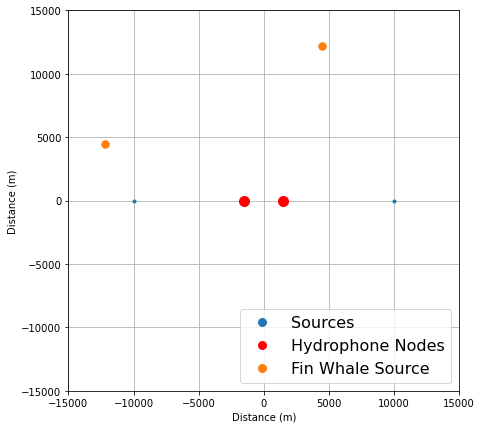

In [27]:
source_distribution = ni_sim.source_distribution2D()
#source_distribution.endfire_circle(10, 10000, 300)
source_distribution.add_custom_sources('fin_model',(13000,160))
source_distribution.add_custom_sources('fin_model',(13000, 70))
source_distribution.add_custom_sources('gauss', (10000, 180))
source_distribution.add_custom_sources('gauss', (10000, 0))
sources = source_distribution.sources

env = ni_sim.environment(sources, time_length=600)
fig, ax = env.plot_env()
plt.xlim([-15000, 15000])
plt.ylim([-15000, 15000])

In [39]:
_ = env.get_signals()
#_ = env.add_incoherent(to_xB=False, scale=0.000001)

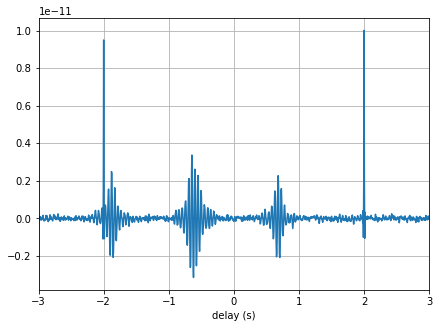

In [43]:
_ = env.correlate(plot=True)
plt.xlim([-3, 3])
plt.grid()

In [9]:
sources

,X,Y,label
0,9848.077530,-1736.481777,gauss
1,9852.118599,-1713.405707,gauss
2,9856.105596,-1690.320233,gauss
3,9860.038499,-1667.225482,gauss
4,9863.917286,-1644.121581,gauss
...,...,...,...
297,-9856.105596,-1690.320233,gauss
298,-9852.118599,-1713.405707,gauss
299,-9848.077530,-1736.481777,gauss
300,-12216.004070,4446.261863,fin_model
